# Data exploration and tidy data

### Objectives
* Tidy data, from theory to practice
* Clean, tidy and preprocess the data

### Notes
* Online course resource in R [link](https://rmagno.eu/tdvr.oct.22/).



In [2]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Data loading

In [3]:
!rm -r 2025-tidy-python
!git clone https://github.com/Py-ualg/2025-tidy-python.git

rm: cannot remove '2025-tidy-python': No such file or directory
Cloning into '2025-tidy-python'...
remote: Enumerating objects: 618, done.
remote: Counting objects: 100% (618/618), done.
remote: Compressing objects: 100% (600/600), done.
remote: Total 618 (delta 45), reused 571 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (618/618), 11.00 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [4]:
# alternative to download single files
# !wget https://github.com/Py-ualg/2025-tidy-python/blob/main/r2py/raw-data-python/2020-01-18_area1.csv

In [5]:
data_raw_path = '2025-tidy-python/r2py/raw-data-python/'

In [6]:
!ls

2025-tidy-python  sample_data


In [7]:
# quadrats01 <- readxl::read_excel(file.path(data_raw_path, "quadrats.xlsx"))
quadrats01  = pd.read_excel(os.path.join(data_raw_path, 'quadrats.xlsx'))
quadrats01.head()

,Unnamed: 0,Ria Formosa-rf,Ria Alvor-ra
0,Area (m2),250,360


In [8]:
# df1_q1 <- readr::read_csv(file.path(data_raw_path, "2020-01-04_q1.csv"))
df1_ra = pd.read_csv(os.path.join(data_raw_path, '2020-01-05_ra.csv')).reset_index(drop=True)
# df1_rf <- readr::read_csv(file.path(data_raw_path, "2020-01-04_rf.csv"))
df1_rf = pd.read_csv(os.path.join(data_raw_path, '2020-01-05_rf.csv')).reset_index(drop=True)
df1_ra.head()

,Unnamed: 0,cl [mm],lcl [mm],fw [mm],species_name,longitude,is_gravid?,rcl [mm],stage,sex,id,cw [mm],latitude,associated_species,depth [m],behavior
0,0,280,117.658024,30,A. Farensis,-7.99163,False,25.126955,s,,1,141.995352,37.01025,"['Snail', 'Crab (Other Species)', 'Algae', 'Se...",8,Struggling with entangled seaweed.
1,1,230,100.162977,70,U. olhanensis,NaN,False,57.257526,a,male,2,156.599804,NaN,"['Shrimp', 'Coral Fragment', 'Snail']",5,Mating behavior with antenna touching.
2,2,260,107.802386,20,U. olhanensis,NaN,False,471.873609,p,female,3,171.818575,NaN,"['Sea Sponge', 'Mussel', 'Polychaete Worm', 'C...",4,Exploring new territory.
3,3,330,87.716106,50,A. Farensis,NaN,False,9.041424,p,male,4,162.136067,NaN,"['Sea Urchin', 'Hermit Crab', 'Jellyfish']",7,Using claws to dig into sediment.
4,4,190,122.225485,50,u. olhanen.,NaN,False,58.626041,j,male,5,149.253750,NaN,"['Hermit Crab', 'Sea Anemone', 'Shrimp', 'Sea ...",8,Climbing barnacle-covered surfaces.


## 2. Tidy data theory
- following the R [tutorial](https://r4ds.had.co.nz/tidy-data.html) so you have a direct correspondance between R and python

In [10]:
table1 = pd.DataFrame(
    {
    "country": ["Afghanistan", "Afghanistan", "Brazil", "Brazil", "China", "China"],
    "year": [1999, 2000, 1999, 2000, 1999, 2000],
    "cases": [745, 2666, 37737, 80488, 212258, 213766],
    "population": [19987071, 20595360, 172006362, 174504898, 1272915272, 1280428583]
    }
)
table1

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [11]:
table2 = pd.DataFrame(
    {
    "country": ["Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan",
                "Brazil", "Brazil", "Brazil", "Brazil",
                "China", "China", "China", "China"],
    "year": [1999, 1999, 2000, 2000,
             1999, 1999, 2000, 2000,
             1999, 1999, 2000, 2000],
    "type": ["cases", "population", "cases", "population",
             "cases", "population", "cases", "population",
             "cases", "population", "cases", "population"],
    "count": [745, 19987071, 2666, 20595360,
              37737, 172006362, 80488, 174504898,
              212258, 1272915272, 213766, 1280428583]
    },
)
table2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


## 3. Data tidying
- First we compare tables from R. Formosa and R. Alvor to identify inconsistencies
- based on that, we preclean all dataframes and concatenate them
- Then tidying will continue, but on single table, things might be easier

**Exercise**: remove the "Unnamed: 0" column
- try different inputs, less specific to more specific

In [ ]:
#@title Solution

df1_ra = df1_ra.drop('Unnamed: 0', axis=1)

In [ ]:
df1_ra.head()

,cl [mm],lcl [mm],fw [mm],species_name,longitude,is_gravid?,rcl [mm],stage,sex,id,cw [mm],latitude,associated_species,depth [m],behavior
0,280,117.658024,30,A. Farensis,-7.99163,False,25.126955,s,,1,141.995352,37.01025,"['Snail', 'Crab (Other Species)', 'Algae', 'Se...",8,Struggling with entangled seaweed.
1,230,100.162977,70,U. olhanensis,NaN,False,57.257526,a,male,2,156.599804,NaN,"['Shrimp', 'Coral Fragment', 'Snail']",5,Mating behavior with antenna touching.
2,260,107.802386,20,U. olhanensis,NaN,False,471.873609,p,female,3,171.818575,NaN,"['Sea Sponge', 'Mussel', 'Polychaete Worm', 'C...",4,Exploring new territory.
3,330,87.716106,50,A. Farensis,NaN,False,9.041424,p,male,4,162.136067,NaN,"['Sea Urchin', 'Hermit Crab', 'Jellyfish']",7,Using claws to dig into sediment.
4,190,122.225485,50,u. olhanen.,NaN,False,58.626041,j,male,5,149.253750,NaN,"['Hermit Crab', 'Sea Anemone', 'Shrimp', 'Sea ...",8,Climbing barnacle-covered surfaces.


In [ ]:
# add region, and date
df1_ra['region'] = "Ria Alvor"
df1_ra['date'] = "2020-01-05"

df1_rf['region'] = "Ria Formosa"
df1_rf['date'] = "2020-01-05"

In [ ]:
df1_ra['date']

,date
0,2020-01-05
1,2020-01-05
2,2020-01-05
3,2020-01-05
4,2020-01-05
...,...
234,2020-01-05
235,2020-01-05
236,2020-01-05
237,2020-01-05


**Exercise**: correct way is to put the date as `datetime`, search what it is and fix it, or ask gemini well.

In [ ]:
#@title Solution

df1_ra['date'] = pd.to_datetime(df1_ra['date'])
df1_rf['date'] = pd.to_datetime(df1_rf['date'])

Check if the column names match for the datasets

In [ ]:
set(df1_ra.columns) - set(df1_rf.columns)

{'behavior',
 'cl [mm]',
 'cw [mm]',
 'fw [mm]',
 'is_gravid?',
 'lcl [mm]',
 'rcl [mm]',
 'species_name'}

** Better and recommended way**
- put `assert` checks everywhere you can
- the idea is to assert outputs, otherwise raise error

In [ ]:
assert set(df1_ra.columns) == set(df1_rf.columns), f"Column names do not match {set(df1_ra.columns) - set(df1_rf.columns)}"

AssertionError: Column names do not match {'is_gravid?', 'cw [mm]', 'behavior', 'cl [mm]', 'rcl [mm]', 'lcl [mm]', 'fw [mm]', 'species_name'}

Exercise: fix the column names

In [ ]:
df1_ra.columns, df1_rf.columns

(Index(['cl [mm]', 'lcl [mm]', 'fw [mm]', 'species_name', 'longitude',
        'is_gravid?', 'rcl [mm]', 'stage', 'sex', 'id', 'cw [mm]', 'latitude',
        'associated_species', 'depth [m]', 'behavior', 'region', 'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'cl [cm]', 'lcl [cm]', 'fw [cm]', 'species', 'longitude',
        'is_gravid', 'rcl [cm]', 'stage', 'sex', 'id', 'cw [cm]', 'latitude',
        'associated_species', 'depth [m]', 'behaviour', 'region', 'date'],
       dtype='object'))

**Exercise**: Plot histograms between mm and cm columns to see if the labels are actually correct

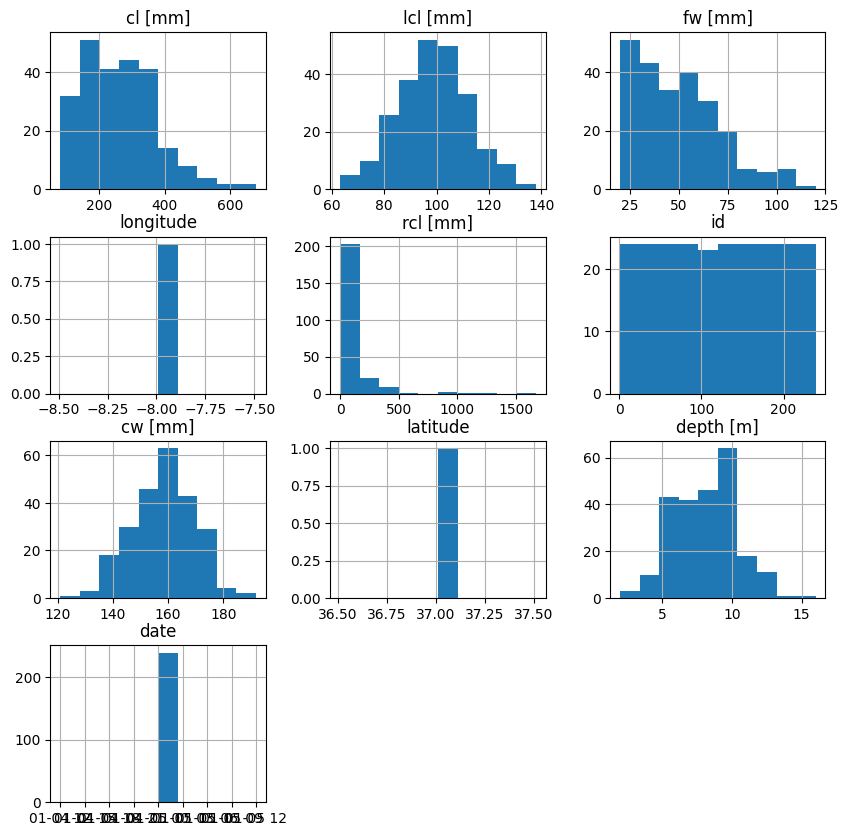

In [ ]:
#@title Solution

df1_ra.hist(figsize=(10, 10))
plt.show()

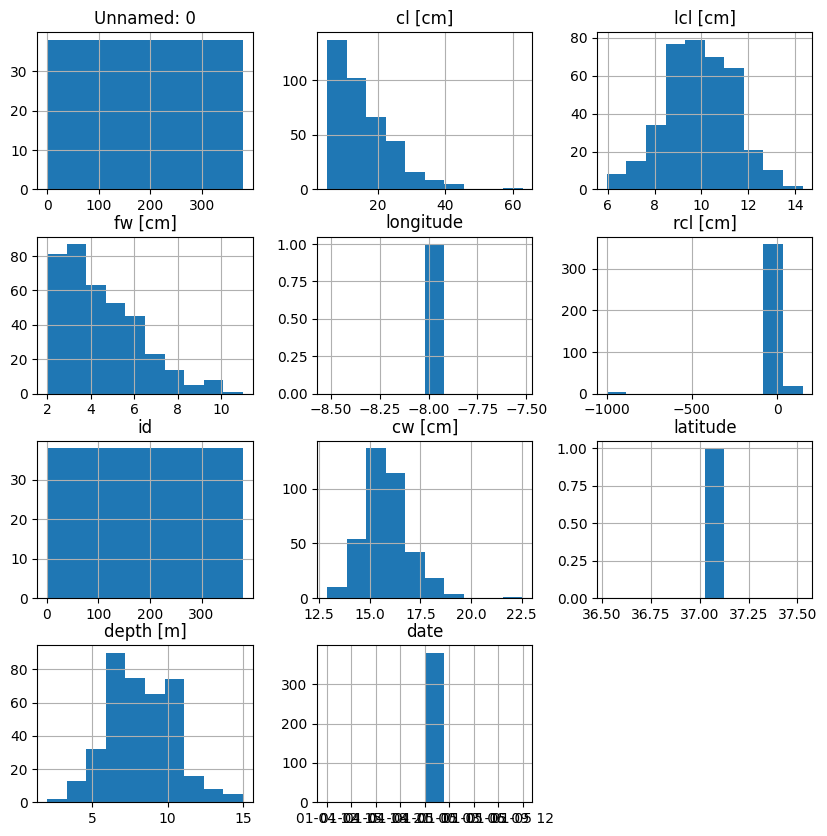

In [ ]:
df1_rf.hist(figsize=(10, 10))
plt.show()

In [ ]:
df1_rf['region'] = "Ria Formosa"
df1_ra.rename(columns={"is_gravid?": "is_gravid", "species_name": "species", "behavior": "behaviour"}, inplace=True)

In [ ]:
assert set(df1_ra.columns) == set(df1_rf.columns), f"Column names do not match {set(df1_ra.columns) - set(df1_rf.columns)}"

AssertionError: Column names do not match {'cw [mm]', 'cl [mm]', 'rcl [mm]', 'lcl [mm]', 'fw [mm]'}

Do you want to work in cm or mm for the rest of your project?
Exercise: if column contains string '[mm]' multiply it by 10 and rename it

In [ ]:
#@title Solution

for col in df1_ra.columns:
    if '[mm]' in col:
        df1_ra[col] = df1_ra[col] / 10
        df1_ra.rename(columns={col: col.replace('[mm]', '[cm]')}, inplace=True)

In [ ]:
assert set(df1_ra.columns) == set(df1_rf.columns), f"Column names do not match {set(df1_ra.columns) - set(df1_rf.columns)}"

AssertionError: Column names do not match set()

Confirm the histograms

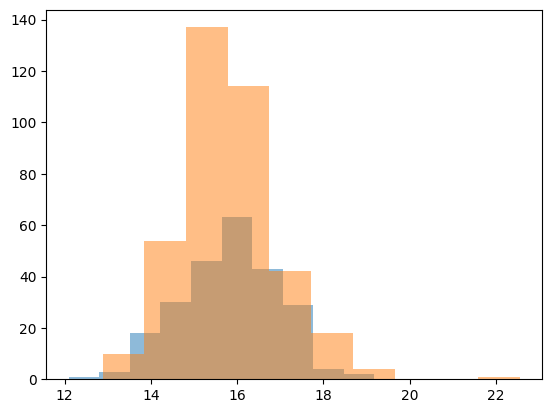

In [ ]:
plt.hist(df1_ra['cw [cm]'], alpha=0.5)
plt.hist(df1_rf['cw [cm]'], alpha=0.5)
plt.show()

In [ ]:
df1_ra.columns

Index(['cl [cm]', 'lcl [cm]', 'fw [cm]', 'species', 'longitude', 'is_gravid',
       'rcl [cm]', 'stage', 'sex', 'id', 'cw [cm]', 'latitude',
       'associated_species', 'depth [m]', 'behaviour', 'region', 'date'],
      dtype='object')

In [ ]:
df1_rf.columns

Index(['Unnamed: 0', 'cl [cm]', 'lcl [cm]', 'fw [cm]', 'species', 'longitude',
       'is_gravid', 'rcl [cm]', 'stage', 'sex', 'id', 'cw [cm]', 'latitude',
       'associated_species', 'depth [m]', 'behaviour', 'region', 'date'],
      dtype='object')

In [ ]:
df1_rf = df1_rf.drop('Unnamed: 0', axis=1)

In [ ]:
assert set(df1_ra.columns) == set(df1_rf.columns), f"Column names do not match {set(df1_ra.columns) - set(df1_rf.columns)}"

Rename abbreviated columns which do not make sense to your student or a reviewer.

In [ ]:
# rename all abbreviated columns
# df1_ra <- dplyr::rename(df1_ra, carapace_width = cw, carapace_length = cl, left_claw_length = lcl, right_claw_length = rcl, front_width = fw)

# Here I do it inplace to save code and space
df1_ra.rename(
    columns={
        "cw [cm]": "carapace_width",
        "cl [cm]": "carapace_length",
        "lcl [cm]": "left_claw_length",
        "rcl [cm]": "right_claw_length",
        'fw [cm]': 'front_width'},
    inplace=True,
)

In [ ]:
df1_ra.head()

,carapace_length,left_claw_length,front_width,species,longitude,is_gravid,right_claw_length,stage,sex,id,carapace_width,latitude,associated_species,depth [m],behaviour,region,date
0,28.0,11.765802,3.0,A. Farensis,-7.99163,False,2.512695,s,,1,14.199535,37.01025,"['Snail', 'Crab (Other Species)', 'Algae', 'Se...",8,Struggling with entangled seaweed.,Ria Alvor,2020-01-05
1,23.0,10.016298,7.0,U. olhanensis,NaN,False,5.725753,a,male,2,15.659980,NaN,"['Shrimp', 'Coral Fragment', 'Snail']",5,Mating behavior with antenna touching.,Ria Alvor,2020-01-05
2,26.0,10.780239,2.0,U. olhanensis,NaN,False,47.187361,p,female,3,17.181858,NaN,"['Sea Sponge', 'Mussel', 'Polychaete Worm', 'C...",4,Exploring new territory.,Ria Alvor,2020-01-05
3,33.0,8.771611,5.0,A. Farensis,NaN,False,0.904142,p,male,4,16.213607,NaN,"['Sea Urchin', 'Hermit Crab', 'Jellyfish']",7,Using claws to dig into sediment.,Ria Alvor,2020-01-05
4,19.0,12.222548,5.0,u. olhanen.,NaN,False,5.862604,j,male,5,14.925375,NaN,"['Hermit Crab', 'Sea Anemone', 'Shrimp', 'Sea ...",8,Climbing barnacle-covered surfaces.,Ria Alvor,2020-01-05


Now is the time we could merge all the data together, before continue the cleanup

**Exercise**:
Do the steps  from the above in the loop to merge all the datasets in `2025-tidy-python/r2py/raw-data-python/` folder.

In [ ]:
# hidden help
from datetime import datetime

column_names = df1_ra.columns
column_names

Index(['carapace_length', 'left_claw_length', 'front_width', 'species',
       'longitude', 'is_gravid', 'right_claw_length', 'stage', 'sex', 'id',
       'carapace_width', 'latitude', 'associated_species', 'depth [m]',
       'behaviour', 'region', 'date'],
      dtype='object')

In [ ]:
#@title Solution

from datetime import datetime

data_list = []
for file in os.listdir(data_raw_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(data_raw_path, file)).reset_index(drop=True)
        df = df.drop('Unnamed: 0', axis=1)

        for col in df.columns:
            if '[mm]' in col:
                df[col] = df[col] / 10
                df.rename(columns={col: col.replace('[mm]', '[cm]')}, inplace=True)

        df.rename(
            columns={
                "cw [cm]": "carapace_width",
                "cl [cm]": "carapace_length",
                "lcl [cm]": "left_claw_length",
                "rcl [cm]": "right_claw_length",
                'fw [cm]': 'front_width'},
            inplace=True,
        )
        if '_ra.csv' in file:
            df['region'] = "Ria Alvor"
        else:
            df['region'] = "Ria Formosa"
        date = file.split('_')[0]
        df['date'] = pd.to_datetime(date) # Convert to datetime object

        try:
            df.rename(columns={"is_gravid?": "is_gravid", "species_name": "species", "behavior": "behaviour"}, inplace=True)
        except:
            pass


        assert set(column_names) == set(df.columns), f"Column names do not match {set(df.columns) - set(column_names)}"
        df[['latitude', 'longitude']] = df[['latitude', 'longitude']].ffill()

        data_list.append(df)

# concatenate dataframes
crabs01 = pd.concat(data_list, ignore_index=True).reset_index(drop=True)

In [ ]:
crabs01.head()

,carapace_length,left_claw_length,front_width,species,longitude,is_gravid,right_claw_length,stage,sex,id,carapace_width,latitude,associated_species,depth [m],behaviour,region,date
0,19.0,7.065256,2.0,A. Farensis,-7.99163,False,1.249854,p,,1,16.179774,37.01025,"['Polychaete Worm', 'Small Fish', 'Crab (Other...",8,Sitting still blending with environment.,Ria Alvor,2022-01-04
1,21.0,4.131649,5.0,A. Farensis,-7.99163,False,6.824946,a,male,2,17.533657,37.01025,"['Barnacle', 'Sea Urchin', 'Algae', 'Shrimp', ...",7,Using claws to dig into sediment.,Ria Alvor,2022-01-04
2,27.0,3.437135,4.0,A farensis,-7.99163,False,184.995377,j,male,3,17.613623,37.01025,"['Small Fish', 'Polychaete Worm']",10,Rapid crossing of open sand.,Ria Alvor,2022-01-04
3,28.0,6.476798,2.0,A. Farensis,-7.99163,False,0.421570,j,male,4,17.073995,37.01025,"['Shrimp', 'Coral Fragment', 'Sea Urchin', 'He...",8,Climbing seaweed stalks.,Ria Alvor,2022-01-04
4,19.0,5.803654,3.0,u. olhanen.,-7.99163,False,79.730934,s,?,5,17.725559,37.01025,['Small Fish'],4,Exchanging antenna taps.,Ria Alvor,2022-01-04


## 4. Data cleaning continues

In [ ]:
#@title First, the id column is quite useles
crabs01.drop(columns=['id'], inplace=True)

In [ ]:
crabs01.columns

Index(['carapace_length', 'left_claw_length', 'front_width', 'species',
       'longitude', 'is_gravid', 'right_claw_length', 'stage', 'sex',
       'carapace_width', 'latitude', 'associated_species', 'depth [m]',
       'behaviour', 'region', 'date'],
      dtype='object')

In [ ]:
#@title Rearrange columns
# crabs02 <-
  # crabs01 %>%
  # dplyr::select(-"id") %>%
  # dplyr::relocate(
    # 'region',
    # 'date',
    # 'latitude',
    # 'longitude',
    # 'species',
    # 'sex',
    # 'stage',
    # 'is_gravid',
    # 'carapace_width',
    # 'carapace_length',
    # 'front_width',
    # 'left_claw_length',
    # 'right_claw_length',
    # 'depth [m]',
    # 'associated_species',
    # 'behaviour'
  # )
crabs02 = crabs01[[
    'region',
    'date',
    'latitude',
    'longitude',
    'species',
    'sex',
    'stage',
    'is_gravid',
    'carapace_width',
    'carapace_length',
    'front_width',
    'left_claw_length',
    'right_claw_length',
    'depth [m]',
    'associated_species',
    'behaviour',
]]

In [ ]:
# count(crabs02, region, latitude, longitude)
crabs02[['region', 'latitude', 'longitude']].value_counts(dropna=False)

,,,count
region,latitude,longitude,
Ria Formosa,37.02606,-8.01873,13780
Ria Alvor,37.01025,-7.99163,8311


In [ ]:
# unique(crabs03$sex)
crabs02['sex'].unique()

array([' ', 'male', '?', 'female', nan, 'male or female', '-', 'N/R'],
      dtype=object)

In [ ]:
# sex_na_aliases <- c("?", "male or female", "-", " ", "N/R")
# crabs04 <-
#   crabs03 %>%
#   mutate(sex = if_else(sex %in% sex_na_aliases, NA_character_, sex))
crabs02['sex'] = crabs02['sex'].apply(lambda x: np.nan if x in ['?', 'male or female', ' ', '-', 'N/R'] else x)

In [ ]:
crabs02['sex'].unique()

array([nan, 'male', 'female'], dtype=object)

In [ ]:
crabs02[['region', 'species', 'stage']].value_counts(dropna=False)

region       species        stage      
Ria Formosa  A. Farensis    pre_puberty    1271
                            sub_adult      1237
Ria Alvor    A farensis     s              1173
             A. Farensis    s              1139
Ria Formosa  u. olhanen.    pre_puberty    1055
             A farensis     pre_puberty    1050
                            sub_adult      1035
             u. olhanen.    sub_adult      1001
Ria Alvor    A farensis     p               889
             A. Farensis    p               884
Ria Formosa  U. olhanensis  pre_puberty     853
             A. Farensis    adult           825
                            juvenile        803
             U. olhanensis  sub_adult       789
             u. olhanen.    adult           719
                            juvenile        707
             A farensis     juvenile        684
Ria Alvor    u. olhanen.    s               677
Ria Formosa  A farensis     adult           667
Ria Alvor    A. Farensis    a               604
             A farensis     a               573
Ria Formosa  U. olhanensis  juvenile        549
                            adult           535
Ria Alvor    u. olhanen.    p               531
             U. olhanensis  s               333
             u. olhanen.    a               312
             A farensis     j               270
             A. Farensis    j               270
             U. olhanensis  p               219
                            a               184
             u. olhanen.    j               163
             U. olhanensis  j                90
Name: count, dtype: int64

In [ ]:
crabs02[['region', 'stage']].value_counts(dropna=False)

region       stage      
Ria Formosa  pre_puberty    4229
             sub_adult      4062
Ria Alvor    s              3322
Ria Formosa  adult          2746
             juvenile       2743
Ria Alvor    p              2523
             a              1673
             j               793
Name: count, dtype: int64

In [ ]:
crabs02.stage = crabs02.stage.apply(lambda x: 'juvenile' if x=='j' else x)
crabs02.stage = crabs02.stage.apply(lambda x: 'pre_puberty' if x=='p' else x)
crabs02.stage = crabs02.stage.apply(lambda x: 'sub_adult' if x=='s' else x)
crabs02.stage = crabs02.stage.apply(lambda x: 'adult' if x=='a' else x)

In [ ]:
crabs02[['region', 'species']].value_counts(dropna=False)

region       species      
Ria Formosa  A. Farensis      4136
             u. olhanen.      3482
             A farensis       3436
Ria Alvor    A farensis       2905
             A. Farensis      2897
Ria Formosa  U. olhanensis    2726
Ria Alvor    u. olhanen.      1683
             U. olhanensis     826
Name: count, dtype: int64

In [ ]:
crabs02.species = crabs02.species.apply(lambda x: 'Afruca farensis' if x in['A. Farensis', 'A farensis'] else x)
crabs02.species = crabs02.species.apply(lambda x: 'Uca olhanensis' if x in ['u. olhanen.', 'U. olhanensis'] else x)

In [ ]:
crabs02[['region', 'species', 'stage']].value_counts(dropna=False)

region       species          stage      
Ria Formosa  Afruca farensis  pre_puberty    2321
Ria Alvor    Afruca farensis  sub_adult      2312
Ria Formosa  Afruca farensis  sub_adult      2272
             Uca olhanensis   pre_puberty    1908
                              sub_adult      1790
Ria Alvor    Afruca farensis  pre_puberty    1773
Ria Formosa  Afruca farensis  adult          1492
                              juvenile       1487
             Uca olhanensis   juvenile       1256
                              adult          1254
Ria Alvor    Afruca farensis  adult          1177
             Uca olhanensis   sub_adult      1010
                              pre_puberty     750
             Afruca farensis  juvenile        540
             Uca olhanensis   adult           496
                              juvenile        253
Name: count, dtype: int64

In [ ]:
# crabs07 <-
#   crabs06 %>%
#   dplyr::mutate(
#     region = factor(region),
#     season = factor(season),
#     quadrat = as.integer(quadrat),
#     species = factor(species),
#     sex = factor(sex, levels = c("female", "male")),
#     stage = factor(stage, levels = c("juvenile", "pre_puberty", "sub_adult", "adult"), ordered = TRUE)
#   )
crabs03 = crabs02.copy()
crabs03[['region', 'species', 'sex']] = crabs03[
                                            ['region',
                                             'species',
                                             'sex']].astype('category')

# for custom ordering
cat_dtype = CategoricalDtype(
    categories=["juvenile", "pre_puberty", "sub_adult", "adult"], ordered=True)
crabs03['stage'] = crabs03['stage'].astype(cat_dtype)

In [ ]:
quadrats01.head()

,Unnamed: 0,Ria Formosa-rf,Ria Alvor-ra
0,Area (m2),250,360


In [ ]:
# quadrats02 <-
#   quadrats01 %>%
#   dplyr::select(-1) %>%
#   tidyr::pivot_longer(cols = everything(), names_to = "region_quadrat", values_to = "area") %>%
#   tidyr::separate(col = "region_quadrat", into = c("region", "quadrat"), sep = "-")

# Drop the first column
quadrats02 = quadrats01.iloc[:, 1:]

# Reshape the DataFrame from wide to long format
quadrats02 = quadrats02.melt(var_name='region_quadrat', value_name='area')

# Separate the 'region_quadrat' column into 'region' and 'quadrat'
quadrats02[['region', 'abb']] = quadrats02['region_quadrat'].str.split('-', expand=True)

# Drop the 'region_quadrat' column
quadrats02.drop(columns=['region_quadrat'], inplace=True)

# reorder columns
quadrats02 = quadrats02[['region', 'area']]

In [ ]:
quadrats02

,region,area
0,Ria Formosa,250
1,Ria Alvor,360


In [ ]:
quadrats03 = quadrats02.copy()
quadrats03[['region']] = quadrats03[['region']].astype('category')

In [ ]:
# quadrats_coord <- dplyr::distinct(crabs07, region, quadrat, latitude, longitude)
# quadrats04 <- dplyr::left_join(quadrats03, quadrats_coord)

# # And now we can drop latitude and longitude from the `crabs07` data set.
# # Note the minus sign behind the vector of column names.
# crabs08 <- select(crabs07, -c("latitude", "longitude"))

# Create quadrats_coord DataFrame containing distinct values of region, quadrat, latitude, and longitude
quadrats_coord = crabs03[['region', 'latitude', 'longitude']].drop_duplicates()

# Merge quadrats03 with quadrats_coord using left join
quadrats04 = pd.merge(quadrats03, quadrats_coord, on=['region'], how='left')

# Drop latitude and longitude columns from crabs07
crabs04 = crabs03.drop(columns=['latitude', 'longitude'])

In [ ]:
quadrats04

,region,area,latitude,longitude
0,Ria Formosa,250,37.02606,-8.01873
1,Ria Alvor,360,37.01025,-7.99163


In [ ]:
crabs04

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth [m],associated_species,behaviour
0,Ria Alvor,2022-01-04,Afruca farensis,NaN,pre_puberty,False,16.179774,19.0,2.0,7.065256,1.249854,8,"['Polychaete Worm', 'Small Fish', 'Crab (Other...",Sitting still blending with environment.
1,Ria Alvor,2022-01-04,Afruca farensis,male,adult,False,17.533657,21.0,5.0,4.131649,6.824946,7,"['Barnacle', 'Sea Urchin', 'Algae', 'Shrimp', ...",Using claws to dig into sediment.
2,Ria Alvor,2022-01-04,Afruca farensis,male,juvenile,False,17.613623,27.0,4.0,3.437135,184.995377,10,"['Small Fish', 'Polychaete Worm']",Rapid crossing of open sand.
3,Ria Alvor,2022-01-04,Afruca farensis,male,juvenile,False,17.073995,28.0,2.0,6.476798,0.421570,8,"['Shrimp', 'Coral Fragment', 'Sea Urchin', 'He...",Climbing seaweed stalks.
4,Ria Alvor,2022-01-04,Uca olhanensis,NaN,sub_adult,False,17.725559,19.0,3.0,5.803654,79.730934,4,['Small Fish'],Exchanging antenna taps.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22086,Ria Alvor,2021-07-15,Uca olhanensis,male,pre_puberty,False,24.517874,20.0,2.0,6.550179,1.490873,8,"['Sea Star', 'Hermit Crab', 'Jellyfish', 'Poly...",Climbing vertical rock face.
22087,Ria Alvor,2021-07-15,Afruca farensis,male,sub_adult,False,19.833434,32.0,2.0,6.759610,0.183009,6,"['Algae', 'Mussel', 'Small Fish', 'Sea Anemone']",Interacting with small fish nearby.
22088,Ria Alvor,2021-07-15,Afruca farensis,male,juvenile,False,20.683533,13.0,2.0,5.437719,0.269580,6,"['Hermit Crab', 'Sea Urchin']",Crab moving quickly across rocks.
22089,Ria Alvor,2021-07-15,Afruca farensis,NaN,pre_puberty,False,22.076323,15.0,3.0,5.813019,1.521727,10,['Sea Urchin'],Sitting still blending with environment.


In [ ]:
## saving
data_tidy_path = os.getcwd() + '/data-tidy'

# Assign new variables with simpler names
quadrats = quadrats04
crabs = crabs04

# Export to disk
quadrats.to_csv(f"metadata.csv", index=False)
crabs.to_csv(f"crabs.csv", index=False)

# Save as pickle files
quadrats.to_pickle(f"metadata.pkl")
crabs.to_pickle(f"crabs.pkl")